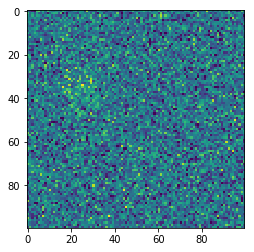

true intensity: 61567.00223725612


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve2d

b = 500
a = 200
s = 7

x = np.array(range(100))
y = np.array(range(100))

ps = 10.0

x0 = 25
y0 = 35

x, y = np.meshgrid(x, y)
dx = x-x0
dy = y-y0

data = b + a * np.exp(-(dx**2+dy**2)/s/s/2.0)
true_intensity = (data-b).sum()
noise = np.sqrt(data)*np.random.normal(0, 1, (100,100))
data += ps*noise
data = (data > 0)*data

plt.imshow(data)
plt.show()

print("true intensity:", true_intensity)

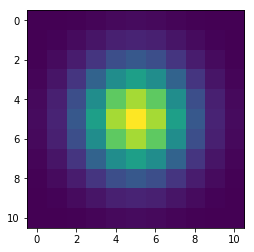

In [2]:
u = np.array(range(11))-5
v = np.array(range(11))-5

u,v = np.meshgrid(u,v)

kernel = np.exp(-(u**2+v**2)/7.0)
kernel /= kernel.sum()

plt.imshow(kernel)
plt.show()

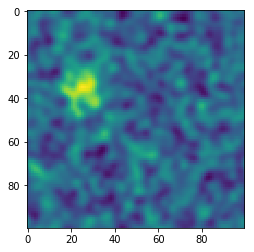

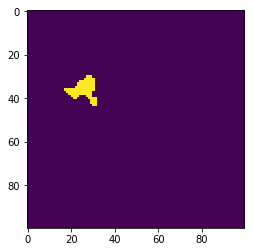

25.693877551020407 36.06122448979592


In [3]:
conv = convolve2d(data, kernel, mode='same', boundary='wrap')

plt.imshow(conv)
plt.show()

peak = conv > conv.mean()+3.5*conv.std()

mu_x = (x*peak).sum() / peak.sum()
mu_y = (y*peak).sum() / peak.sum()

plt.imshow(peak)
plt.show()

print(mu_x, mu_y)

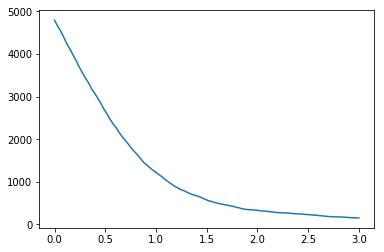

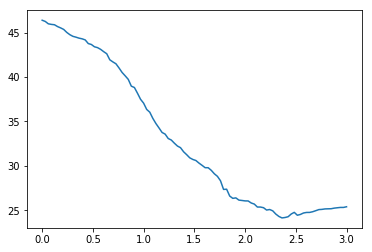

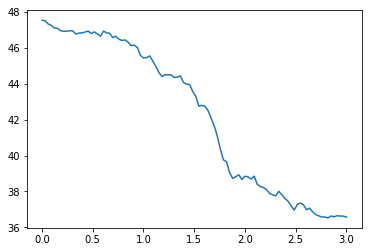

In [4]:
ts = np.linspace(0, 3, num=100)
peak_ts = [ conv > conv.mean() + t*conv.std() for t in ts ]
ns = [ pt.sum() for pt in peak_ts ]
xs = [ (x*pt).sum() / pt.sum() for pt in peak_ts ]
ys = [ (y*pt).sum() / pt.sum() for pt in peak_ts ]
plt.plot(ts, ns)
plt.show()

plt.plot(ts, xs)
plt.show()

plt.plot(ts, ys)
plt.show()